## Variables categorícas
algunos dataset tienen variables categoricas, como nombres o variables de texto
### Dummy
se crean los dummys dependiendo de las variables n-1

### modelo linel normal
> Ymodel=theta+(betha*variable)+(betha2*variable2)+error...
### Modelo lineal categorico
>Ymodel=theta+(betha*variable)+(betha2*variable2)...+Bk+...BnXn+e si es hombre
>
>Ymodel=theta+(betha*variable)+(betha2*variable2)...BnXn+e si es mujer

## Ejemplo

In [1]:
## librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
## importamos el csv
data=pd.read_csv("archivos/economic/economic.csv")
data.head(5)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [3]:
## hacer dummy gender
dummy_gender=pd.get_dummies(data["Gender"], prefix="Gender")
dummy_gender

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
2357,0,1
2358,0,1
2359,1,0
2360,1,0


In [4]:
## hacer dummy nivel de ciudad
dummy_city_tier=pd.get_dummies(data["City Tier"], prefix="City")
dummy_city_tier

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [5]:
## unir con el dataframe original
column_names=data.columns.to_list()
data=data[column_names].join(dummy_city_tier)
column_names=data.columns.to_list()

In [6]:
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [7]:
data=data[column_names].join(dummy_gender)

In [8]:
column_names=data.columns.to_list()

In [9]:
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3',
 'Gender_Female',
 'Gender_Male']

In [10]:
data.head(2)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,City_Tier 1,City_Tier 2,City_Tier 3,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,0,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0,1,0


In [11]:
pos_columns=[ "%s.- %s"%(x, column_names[x]) for x in range(len(column_names))]
pos_columns

['0.- Transaction ID',
 '1.- Age ',
 '2.-  Items ',
 '3.- Monthly Income',
 '4.- Transaction Time',
 '5.- Record',
 '6.- Gender',
 '7.- City Tier',
 '8.- Total Spend',
 '9.- City_Tier 1',
 '10.- City_Tier 2',
 '11.- City_Tier 3',
 '12.- Gender_Female',
 '13.- Gender_Male']

In [12]:
feature_columns=column_names[3:5]+ column_names[9:12]+column_names[12:14]+column_names[5:6]
feature_columns

['Monthly Income',
 'Transaction Time',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3',
 'Gender_Female',
 'Gender_Male',
 'Record']

In [13]:
## creamos un dataset con las variables predictorias
x=data[feature_columns]
## creamos un dataframe con la variable a predecir
y=data[column_names[8]]

In [14]:
## creamos una instancia el modelo que vamos a ocupar
lm=LinearRegression()

In [15]:
## pasamos los datos para poder crear el modelo
lm.fit(x,y)

LinearRegression()

In [16]:
lm.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [17]:
## obtemos beta
lm.intercept_

-79.4171303013718

In [18]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01,  7.67643260e+01,  5.51389743e+01,
       -1.31903300e+02, -1.31025013e+02,  1.31025013e+02,  7.72233446e+02])

In [19]:
## unir coeficientes
coef_list=list(zip(feature_columns, lm.coef_))
coef_list

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.154946125495895),
 ('City_Tier 1', 76.76432601049386),
 ('City_Tier 2', 55.13897430923323),
 ('City_Tier 3', -131.903300319727),
 ('Gender_Female', -131.02501325554644),
 ('Gender_Male', 131.0250132555464),
 ('Record', 772.2334457445646)]

In [20]:
## saber el r2 para saber que tan bueno es el modelo
lm.score(x,y)

0.9179923586131016

In [21]:
for t in coef_list:
    print("(data[\"%s\"]*%s)+ "%(t[0], t[1]), end="")

(data["Monthly Income"]*0.14753898049205738)+ (data["Transaction Time"]*0.154946125495895)+ (data["City_Tier 1"]*76.76432601049386)+ (data["City_Tier 2"]*55.13897430923323)+ (data["City_Tier 3"]*-131.903300319727)+ (data["Gender_Female"]*-131.02501325554644)+ (data["Gender_Male"]*131.0250132555464)+ (data["Record"]*772.2334457445646)+ 

## Modelo
**Total Spend**=79.4171303013718+(Monthly Income\*0.14753898049205738)+ (Transaction Time\*0.154946125495895)+ (City_Tier 1\*76.76432601049386)+ (City_Tier 2\*55.13897430923323)+ (City_Tier 3\*-131.903300319727)+ (Gender_Female\*-131.02501325554644)+ (Gender_Male\*131.0250132555464)+ (Record\*772.2334457445646)+

In [22]:
## predecir
prediccion=79.4171303013718+(data["Monthly Income"]*0.14753898049205738)+ (data["Transaction Time"]*0.154946125495895)+ (data["City_Tier 1"]*76.76432601049386)+ (data["City_Tier 2"]*55.13897430923323)+ (data["City_Tier 3"]*-131.903300319727)+ (data["Gender_Female"]*-131.02501325554644)+ (data["Gender_Male"]*131.0250132555464)+ (data["Record"]*772.2334457445646)

In [23]:
prediccion

0       5062.530980
1       4958.269086
2       5315.916765
3       8226.847257
4       3740.814595
           ...     
2357    3495.290915
2358    8228.182783
2359    9209.524619
2360    8379.430355
2361    6973.147350
Length: 2362, dtype: float64

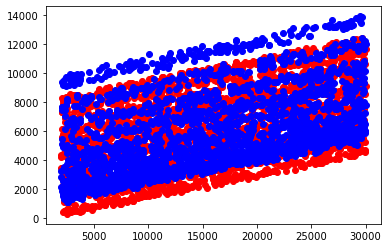

In [24]:
plt.plot(data[column_names[3]], prediccion, "ro")
plt.plot(data[column_names[3]], data[column_names[8]], "bo")

In [25]:
## súma de los cuadrados de las diferencias
SSD=np.sum((prediccion-data[column_names[8]])**2)

SSD

1577323282.7107792

In [26]:
## Desviación estandar de los residuos
RSE=np.sqrt(SSD/(len(data)-len(feature_columns)-1))
## esta es la diferencia que puede haber de la prediccion con la realidad
RSE

818.7463810675247

In [27]:
##promedio de los datos o de la variable a explicar
promedio=np.mean(data[column_names[8]])
promedio

6163.176415976714

In [28]:
error=RSE/promedio
error

0.13284487183347538

In [29]:
nuevos_nombres={}
for t in data.columns.tolist():
    new_name=t.strip()
    new_name=t.replace(" ","_")
    nuevos_nombres[t]=new_name
nuevos_nombres 

{'Transaction ID': 'Transaction_ID',
 'Age ': 'Age_',
 ' Items ': '_Items_',
 'Monthly Income': 'Monthly_Income',
 'Transaction Time': 'Transaction_Time',
 'Record': 'Record',
 'Gender': 'Gender',
 'City Tier': 'City_Tier',
 'Total Spend': 'Total_Spend',
 'City_Tier 1': 'City_Tier_1',
 'City_Tier 2': 'City_Tier_2',
 'City_Tier 3': 'City_Tier_3',
 'Gender_Female': 'Gender_Female',
 'Gender_Male': 'Gender_Male'}

In [30]:
data=data.rename(columns=nuevos_nombres)

In [31]:
column_names=data.columns.tolist()
feature_columns=column_names[3:5]+ column_names[9:12]+column_names[12:14]+column_names[5:6]
formula=""
for t in feature_columns:
    formula+="%s+"%(t)
formula=formula[:-1]
formula

'Monthly_Income+Transaction_Time+City_Tier_1+City_Tier_2+City_Tier_3+Gender_Female+Gender_Male+Record'

In [32]:
formula=column_names[8]+"~"+formula
formula

'Total_Spend~Monthly_Income+Transaction_Time+City_Tier_1+City_Tier_2+City_Tier_3+Gender_Female+Gender_Male+Record'

In [33]:
import statsmodels.formula.api as smf

In [34]:
lm_libreria=smf.ols(formula=formula, data=data).fit()

In [35]:
lm_libreria.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Spend   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     4394.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:02:32   Log-Likelihood:                -19145.
No. Observations:                2362   AIC:                         3.830e+04
Df Residuals:                    2355   BIC:                         3.834e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -43.3184     29.550     -1.466      0.143    -101.266      14.629
Monthly_Income       0.1475      0.002     71.753      0.000       0.144       0.152
Transaction_Time     0.1549      0.058      2.678      0.007       0.041       0.268
City_Tier_1         62.3248     25.108      2.482      0.013      13.089     111.560
City_Tier_2         40.6995     25.263      1.611      0.107      -8.841      90.240
City_Tier_3       -146.3428     25.719     -5.690      0.000    -196.777     -95.909
Gender_Female     -152.6842     22.033     -6.930      0.000    -195.891    -109.478
Gender_Male        109.3658     22.316      4.901      0.000      65.606     153.126
Record             772.2334      5.359    144.111      0.000     761.725     782.741
==============================================================================
Omnibus:                      342.099   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.310
Skew:                           0.573   Prob(JB):                     1.43e-43
Kurtosis:                       2.168   Cond. No.                     2.31e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
feature_columns

['Monthly_Income',
 'Transaction_Time',
 'City_Tier_1',
 'City_Tier_2',
 'City_Tier_3',
 'Gender_Female',
 'Gender_Male',
 'Record']

In [37]:
lm.predict(data[feature_columns])

array([4903.69671986, 4799.4348257 , 5157.08250392, ..., 9050.6903581 ,
       8220.59609399, 6814.31308959])

In [38]:
len(lm.predict(pd.DataFrame(data[feature_columns])))

2362

### al ser la formúla n-1 solo habrá un n-1 mdelos para cada variable categoríca

## Eliminar variables dummy redundantes

In [39]:
gender_dummy=pd.get_dummies(data["Gender"], prefix="Gender").iloc[:, 1:]
gender_dummy

,Gender_Male
0,0
1,0
2,1
3,0
4,0
...,...
2357,1
2358,1
2359,0
2360,0


In [40]:
gender_dummy.columns
data=data.join(gender_dummy)


ValueError: columns overlap but no suffix specified: Index(['Gender_Male'], dtype='object')

In [ ]:
data

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0
...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,1
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,1
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,0
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,0


In [ ]:
dummy_city_tier=pd.get_dummies(data["City Tier"], prefix="City_tier").iloc[:,1:]
dummy_city_tier

,City_tier_Tier 2,City_tier_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [ ]:
data=data.join(dummy_city_tier)
data.columns

Index(['Transaction ID', 'Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender', 'City Tier', 'Total Spend',
       'Gender_Male', 'City_tier_Tier 2', 'City_tier_Tier 3'],
      dtype='object')

In [ ]:
data.head(5)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_tier_Tier 2,City_tier_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [ ]:
column_names=data.columns.tolist()
feature_columns=column_names[3:5]+ column_names[9:12]+column_names[12:14]+column_names[5:6]
feature_columns

['Monthly Income',
 'Transaction Time',
 'Gender_Male',
 'City_tier_Tier 2',
 'City_tier_Tier 3',
 'Record']

In [ ]:
## columnas par el modelo
x=data[feature_columns]
y=data["Total Spend"]

In [ ]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [ ]:
lm.intercept_

-133.67781754642056

In [ ]:
lm.predict

<bound method LinearModel.predict of LinearRegression()>

In [ ]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01,  2.62050027e+02, -2.16253517e+01,
       -2.08667626e+02,  7.72233446e+02])

In [ ]:
unir=list(zip(feature_columns, lm.coef_))

In [ ]:
unir

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589887),
 ('Gender_Male', 262.0500265110947),
 ('City_tier_Tier 2', -21.62535170126259),
 ('City_tier_Tier 3', -208.66762633022293),
 ('Record', 772.2334457445634)]

In [ ]:
#r cuadrado
lm.score(x,y)

0.9179923586131016